### Ch5_Q08
We will now perform cross-validation on a simulated data set.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
import statsmodels.api as sm

#### (a) Generate a simulated data set as follows:
rng = np.random.default_rng(1)<br>
x = rng.normal(size=100)<br>
y = x - 2 * x**2 + rng.normal(size=100)<br>
#### In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [25]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

n = 100, p = 1<br>
The model used to generate the data can be written as: $ Y = X − 2X^2 + 𝜖 $, where 
$𝜖$ is a random noise term following a normal distribution.

#### (b) Create a scatterplot of X against Y . Comment on what you find.

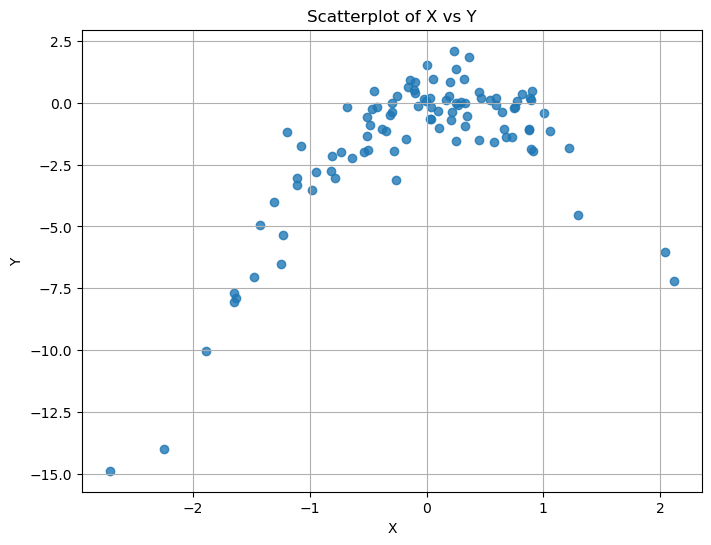

In [26]:
# Scatter plot of X against Y
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y")
plt.grid(True)
plt.show()

The scatterplot seems like a *parabolic trend* due to the quadratic term $-2X$ in the model. <br>

**Symmetry Around the Origin:** Since $y=x−2x^2+𝜖$ and without the noise $𝜖$, $y$ would be symmetric around the origin. We might see data points scattered around this parabolic curve due to the added noise, giving a somewhat "fuzzy" appearance around the curve.<br>

**Spread Due to Noise:** The noise term $𝜖$ adds variability, so individual points will deviate from the smooth curve, creating a spread in the data. This scatter indicates the randomness and noise inherent in real-world data.



#### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
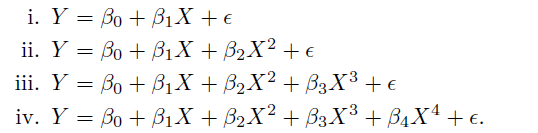
#### Note you may find it helpful to use the data.frame( ) function to create a single data set containing both X and Y.

In [27]:
data = pd.DataFrame({'X': x, 'Y': y})

# Define the models we want to fit (polynomial models)
def loocv_error(X, y, degree):
    loo = LeaveOneOut()
    errors = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model (polynomial regression of the given degree)
        poly_features = np.vander(X_train, N=degree+1, increasing=True)
        model = LinearRegression()
        model.fit(poly_features, y_train)

        # Predict for the test sample
        poly_test = np.vander(X_test, N=degree+1, increasing=True)
        y_pred = model.predict(poly_test)

        # Calculate the squared error
        errors.append((y_pred - y_test)**2)
    return np.mean(errors)

for degree in range(1, 5):
    error = loocv_error(x, y, degree)
    print(f"LOOCV Error for degree {degree}: {error}")

LOOCV Error for degree 1: 6.633029839181983
LOOCV Error for degree 2: 1.122936856341969
LOOCV Error for degree 3: 1.301796548935887
LOOCV Error for degree 4: 1.3323942694179374


#### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [28]:
rng2 = np.random.default_rng(2)

x2 = rng2.normal(size=100)
y2 = x2 - 2 * x2**2 + rng2.normal(size=100)

# Recompute LOOCV errors for the new dataset
for degree in range(1, 5):
    error = loocv_error(x2, y2, degree)
    print(f"LOOCV Error for degree {degree} with new seed: {error}")

LOOCV Error for degree 1 with new seed: 7.560603694358579
LOOCV Error for degree 2 with new seed: 0.9840371744582584
LOOCV Error for degree 3 with new seed: 0.9682355765918605
LOOCV Error for degree 4 with new seed: 0.9659585554875687


If the random seed is different, the errors should be slightly different because of the random noise in the data. However, the overall trend (i.e., the performance of each model) should remain consistent.

#### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The model with the smallest LOOCV error is usually the best choice, since it balances the bias and variance of the model. In this case, a quadratic model (degree 2) should perform well, as the data follows a quadratic relationship, and higher-degree polynomials may overfit the data.

We would expect degree 2 to have the smallest error, but this should be confirmed by the LOOCV results.

#### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [23]:
# Fit models using statsmodels
def fit_model(X, y, degree):
    X_poly = np.vander(X, N=degree+1, increasing=True)
    X_poly = sm.add_constant(X_poly)  # Adding a constant for the intercept
    model = sm.OLS(y, X_poly).fit()
    return model.summary()

# Fit models for degrees 1, 2, 3, 4 and print the summaries
for degree in range(1, 5):
    print(f"Model summary for degree {degree}:")
    print(fit_model(x, y, degree))

Model summary for degree 1:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.04e-09
Time:                        23:44:20   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650   

If the p-values for higher-degree coefficients are large, it suggests that these terms might not be statistically significant and the model could be overfitting.
Comparing these results with LOOCV, we may find that models with higher-degree terms might overfit (even if coefficients are significant), leading to worse LOOCV performance.

The quadratic model (degree 2) should likely perform the best, as the true model generating the data is quadratic. Overfitting can occur in higher-degree polynomial models, even if coefficients appear statistically significant.